# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_results_df =pd.DataFrame(study_results)
combined_data = pd.merge(mouse_df,study_results_df, how ="outer",on = "Mouse ID")
# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_duplicate_id = mice_duplicates["Mouse ID"].unique()
mice_duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data=combined_data[combined_data['Mouse ID'].isin(mice_duplicate_id)==False]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = clean_combined_data["Mouse ID"].nunique()
print(cleaned_mice_num)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).mean()
median = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).median()
var = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).var()
std = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).std()
sem = clean_combined_data['Tumor Volume (mm3)'].groupby(clean_combined_data['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg =  clean_combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

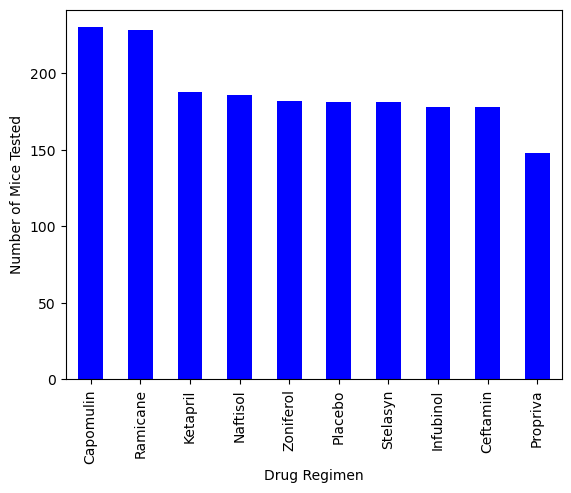

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_and_drugs = clean_combined_data[["Drug Regimen","Timepoint"]]

mice_cnt = mice_and_drugs["Drug Regimen"].value_counts()
#Use DataFrame.plot() in order to create a bar chart of the data
mice_cnt.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()


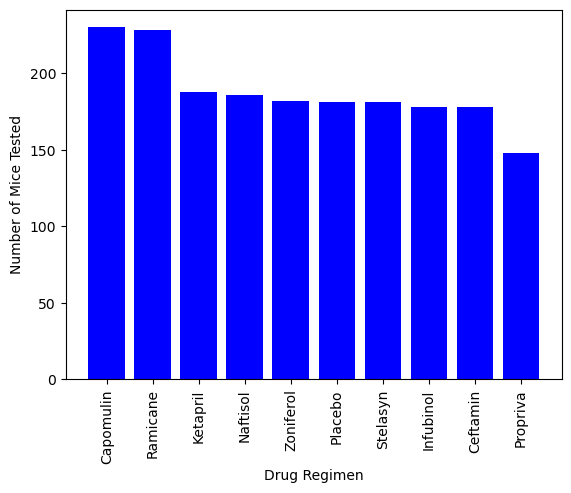

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_cnt.index.values
count = mice_cnt.values
plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

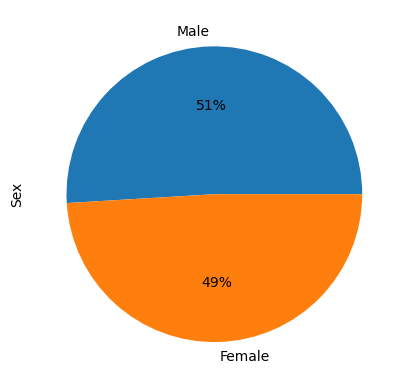

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_data = clean_combined_data["Sex"].value_counts()
sex = female_male_data.index.values
female_male_data.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

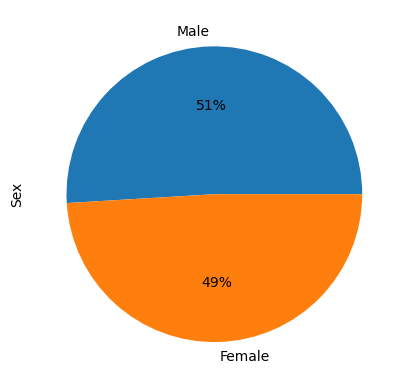

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male_data = clean_combined_data["Sex"].value_counts()
sex = female_male_data.index.values
plt.ylabel("Sex")
plt.pie(female_male_data, labels = sex, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ceftamin", :]
Placebo_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Placebo", :]
Stelasyn_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Stelasyn", :]
Zoniferol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Zoniferol", :]
Ketapril_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ketapril", :]
Proprival_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Propriva", :]
Naftisol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Naftisol", :]

# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_volume, clean_combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
new_df = pd.DataFrame({"Capomulin": Capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": Ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": Infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": Ceftamin_df["Tumor Volume (mm3)"],
           "Placebo": Placebo_df["Tumor Volume (mm3)"],
          "Stelasyn": Stelasyn_df["Tumor Volume (mm3)"],
           "Zoniferol": Zoniferol_df["Tumor Volume (mm3)"],
          "Ketapril": Ketapril_df["Tumor Volume (mm3)"],
         "Propriva": Proprival_df["Tumor Volume (mm3)"],
          "Naftisol": Naftisol_df["Tumor Volume (mm3)"]})
        

new_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin,Placebo,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,38.825898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,35.014271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,34.223992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,32.997729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = []
for drug in clean_combined_data["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)
print(f"{treatments}")
# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    #list containing upper and lower quartiles of drug final timor volume 
     # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list
lower_bound = lowerq - (1.5*drug_iqr)
upper_bound = upperq + (1.5*drug_iqr)

['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
iqr for Ramicane: 8.325365415
iqr for Capomulin: 7.314067135000002
iqr for Infubinol: 10.002090667500006
iqr for Placebo: 12.457881529999995
iqr for Ceftamin: 9.593010457500007
iqr for Stelasyn: 10.67215848
iqr for Zoniferol: 10.616382797500002
iqr for Ketapril: 12.637963814999999
iqr for Propriva: 9.597257012500002
iqr for Naftisol: 12.677160092499996


Text(0.5, 0, '')

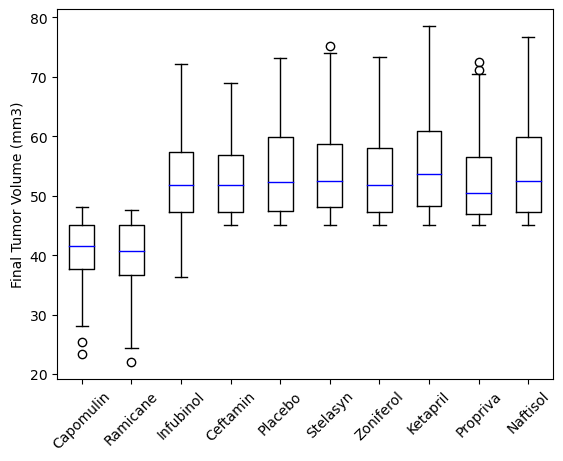

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = new_df.boxplot(grid = False,  rot=45, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

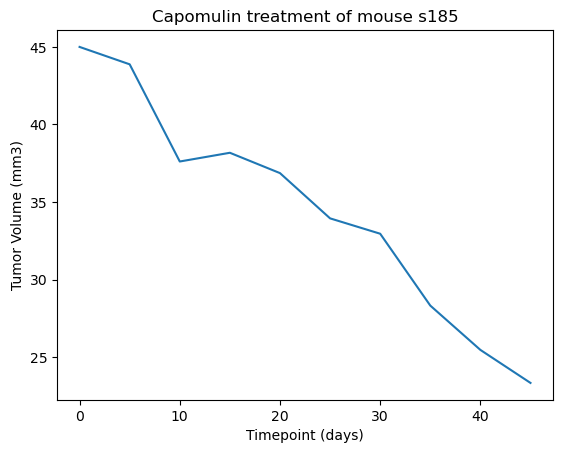

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create dataframe with just Capolumin data
#combined_data.loc[combined_data["Drug Regimen"] == 'Capomulin']
capomulin_df = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin") & (clean_combined_data["Mouse ID"] == "s185") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)"]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

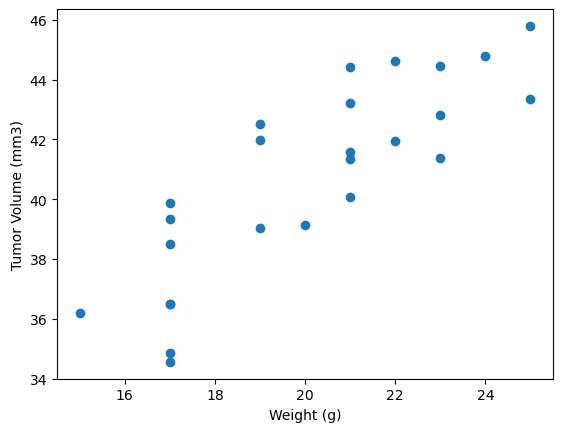

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin")]

group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


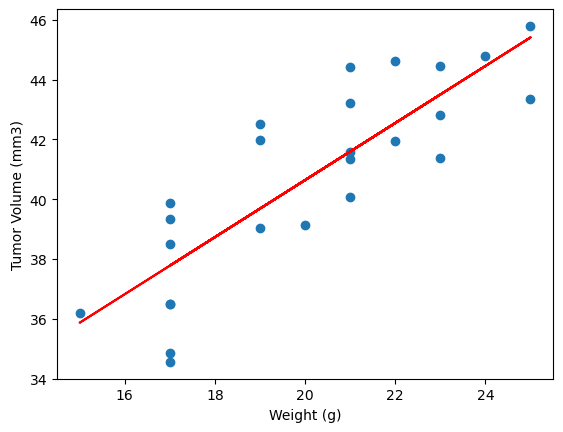

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()